In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [4]:
# Load the dataset
data = pd.read_csv("/content/sales_data_sample.csv", encoding='ISO-8859-1')

# Display the first few rows
print(data.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [5]:
# Select numeric features for clustering
numeric_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID']
data_numeric = data[numeric_features]

# Handle missing values if any
data_numeric = data_numeric.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


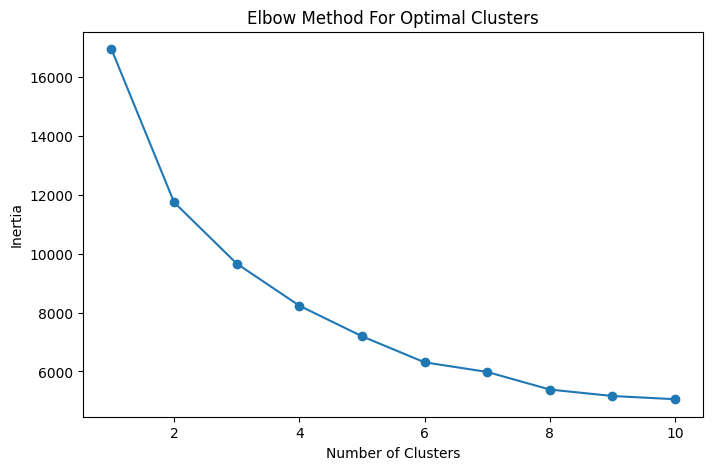

In [6]:
# Elbow Method to determine the number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method For Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [7]:
# Fit K-Means with the chosen number of clusters
optimal_clusters = 3  # adjust based on elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data_numeric['Cluster'] = kmeans.fit_predict(data_scaled)

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns


# What is PCA (Principal Component Analysis)?
Principal Component Analysis (PCA) is a statistical technique used to simplify a dataset by reducing its dimensions while retaining as much information as possible. PCA transforms the data into a set of new, uncorrelated features called principal components, ordered by the amount of variance each component explains in the original dataset.

# How PCA Works:
Standardization: PCA begins by standardizing the data (mean=0, variance=1) to ensure that all features contribute equally, regardless of their original scales.
Covariance Matrix Calculation: It then calculates the covariance matrix to understand relationships between the features.
Eigenvalues and Eigenvectors: PCA computes eigenvalues and eigenvectors of the covariance matrix, where eigenvectors represent directions of maximum variance (principal components) and eigenvalues represent the magnitude (or importance) of each principal component.
Transformation: Finally, the original data is transformed into a new space formed by these principal components, sorted by the amount of variance they capture.
By selecting the top principal components, PCA reduces the dataset's dimensions, simplifying the data while retaining the most critical variance.

# Why Use PCA?
PCA is especially helpful in:

Reducing Computational Complexity: By lowering the number of features, PCA makes it computationally easier to analyze large datasets.
Improving Visualization: High-dimensional data can be hard to visualize; PCA helps reduce dimensions to 2D or 3D for easier visual exploration.
Reducing Noise: PCA captures the main structure in the data, potentially filtering out some noise, which can improve the performance of certain algorithms.
PCA in the Clustering Task Here
In the context of clustering with the sales_data_sample.csv dataset:

Purpose: We initially considered PCA to reduce the dataset's dimensionality, which would allow us to visualize clusters in a 2D or 3D space more easily. This would help reveal natural groupings or clusters in a simplified visual format, enabling us to understand cluster separations.
Steps: PCA would be applied to the scaled version of the selected numeric features, such as QUANTITYORDERED, PRICEEACH, SALES, etc. The resulting principal components (PC1, PC2, etc.) could then be used to plot the data in a reduced 2D or 3D space.

In [9]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Convert to DataFrame for plotting
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca_df['Cluster'] = data_numeric['Cluster']


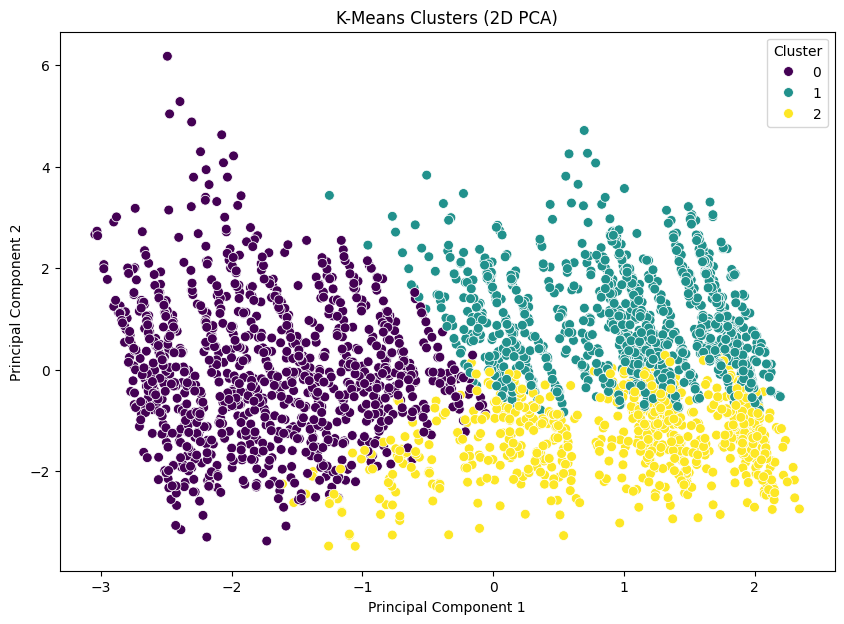

In [10]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_pca_df, palette='viridis', s=50)
plt.title("K-Means Clusters (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


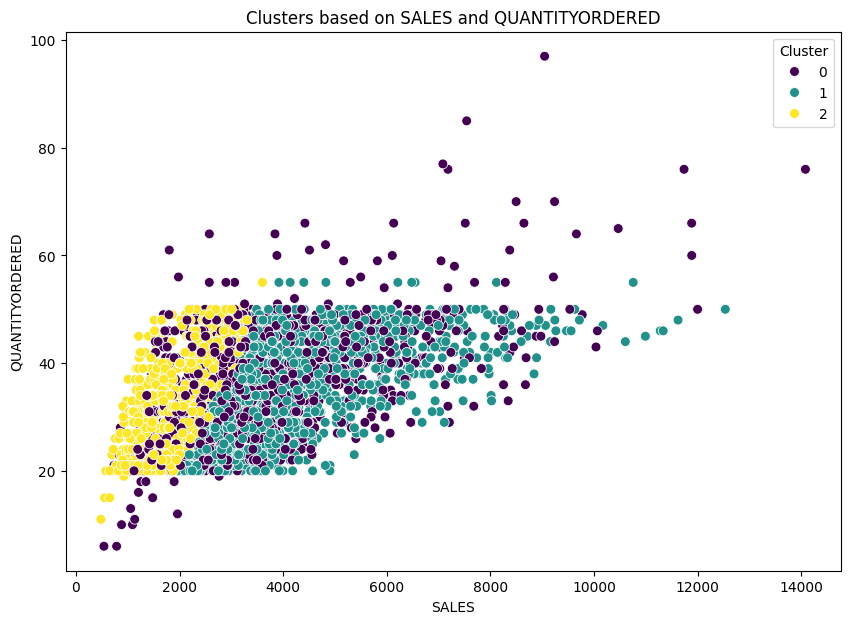

In [11]:
# Plot clusters using existing columns (e.g., SALES and QUANTITYORDERED)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='SALES', y='QUANTITYORDERED', hue='Cluster', data=data_numeric, palette='viridis', s=50)
plt.title("Clusters based on SALES and QUANTITYORDERED")
plt.xlabel("SALES")
plt.ylabel("QUANTITYORDERED")
plt.legend(title='Cluster')
plt.show()
